In [2]:
import pandas as pd

In [28]:
#save filepath to variable for easier access
fluprint_export_path = 'C:\\Users\\indra\\OneDrive\\Bureaublad\\LSAoBD.practicals\\R Project\\fluprint_export.csv'
#read and store data in dataframe fluprint_data
fluprint_data = pd.read_csv(fluprint_export_path)
#summary of data
fluprint_data.describe()
fluprint_data.describe(include='all').loc[:, ['geo_mean', 'vaccine_response', 'name_formatted']]

,geo_mean,vaccine_response,name_formatted
count,156118.000000,112456.000000,156118
unique,NaN,NaN,3283
top,NaN,NaN,L50_FASL
freq,NaN,NaN,555
mean,30.242540,0.300927,NaN
std,40.040675,0.458663,NaN
min,0.000000,0.000000,NaN
25%,2.150000,0.000000,NaN
50%,20.000000,0.000000,NaN
75%,47.570000,1.000000,NaN


In [30]:
fluprint_data.head()

,donor_id,study_id,gender,race,visit_id,visit_year,visit_day,visit_type_hai,visit_age,cmv_status,...,vaccinated_2yr_prior,vaccine_type_2yr_prior,vaccinated_3yr_prior,vaccine_type_3yr_prior,vaccinated_4yr_prior,vaccine_type_4yr_prior,vaccinated_5yr_prior,vaccine_type_5yr_prior,influenza_infection_history,influenza_hospitalization
0,813,15,Female,Caucasian,2937,2014,0,pre,23.0,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,0,0
1,813,15,Female,Caucasian,2937,2014,0,pre,23.0,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,0,0
2,813,15,Female,Caucasian,2937,2014,0,pre,23.0,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,0,0
3,813,15,Female,Caucasian,2937,2014,0,pre,23.0,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,0,0
4,813,15,Female,Caucasian,2937,2014,0,pre,23.0,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,0,0


In [40]:
fluprint_data.columns

Index(['donor_id', 'study_id', 'gender', 'race', 'visit_id', 'visit_year',
       'visit_day', 'visit_type_hai', 'visit_age', 'cmv_status', 'ebv_status',
       'bmi', 'vaccine', 'geo_mean', 'd_geo_mean', 'vaccine_response',
       'mesurment_id', 'assay', 'name', 'name_formatted', 'subset', 'units',
       'data', 'statin_use', 'flu_vaccination_history',
       'total_vaccines_received', 'vaccinated_1yr_prior',
       'vaccine_type_1yr_prior', 'vaccinated_2yr_prior',
       'vaccine_type_2yr_prior', 'vaccinated_3yr_prior',
       'vaccine_type_3yr_prior', 'vaccinated_4yr_prior',
       'vaccine_type_4yr_prior', 'vaccinated_5yr_prior',
       'vaccine_type_5yr_prior', 'influenza_infection_history',
       'influenza_hospitalization'],
      dtype='object')

In [46]:
selected_columns = ['geo_mean', 'vaccine_response', 'name_formatted']
total_datapoints = fluprint_data[selected_columns].size
total_datapoints

468354

In [58]:
fluprint_data['geo_mean_before'] = fluprint_data['geo_mean'] - fluprint_data['d_geo_mean']
fluprint_data['geo_mean_fold_change'] = fluprint_data['geo_mean'] / fluprint_data['geo_mean_before']
fluprint_data.loc[:, ['geo_mean', 'd_geo_mean', 'geo_mean_before', 'geo_mean_fold_change', 'vaccine_response']]

,geo_mean,d_geo_mean,geo_mean_before,geo_mean_fold_change,vaccine_response
0,380.55,1.0,379.55,1.002635,0.0
1,380.55,1.0,379.55,1.002635,0.0
2,380.55,1.0,379.55,1.002635,0.0
3,380.55,1.0,379.55,1.002635,0.0
4,380.55,1.0,379.55,1.002635,0.0
...,...,...,...,...,...
156113,0.00,226.0,-226.00,-0.000000,NaN
156114,0.00,226.0,-226.00,-0.000000,NaN
156115,0.00,226.0,-226.00,-0.000000,NaN
156116,0.00,226.0,-226.00,-0.000000,NaN


In [74]:
high_responders = fluprint_data[(fluprint_data['geo_mean'] >= 40) & (fluprint_data['geo_mean_fold_change'] >= 4)]
high_responders

,donor_id,study_id,gender,race,visit_id,visit_year,visit_day,visit_type_hai,visit_age,cmv_status,...,vaccinated_3yr_prior,vaccine_type_3yr_prior,vaccinated_4yr_prior,vaccine_type_4yr_prior,vaccinated_5yr_prior,vaccine_type_5yr_prior,influenza_infection_history,influenza_hospitalization,geo_mean_before,geo_mean_fold_change


In [82]:
high_responders = fluprint_data[fluprint_data['vaccine_response'] == 1]
num_high_responders = len(high_responders)
num_high_responders

33841

In [86]:
high_responders.loc[:, ['geo_mean', 'd_geo_mean', 'geo_mean_before', 'geo_mean_fold_change', 'vaccine_response']]

,geo_mean,d_geo_mean,geo_mean_before,geo_mean_fold_change,vaccine_response
1120,190.27,6.0,184.27,1.032561,1.0
1121,190.27,6.0,184.27,1.032561,1.0
1122,190.27,6.0,184.27,1.032561,1.0
1123,190.27,6.0,184.27,1.032561,1.0
1124,190.27,6.0,184.27,1.032561,1.0
...,...,...,...,...,...
151889,56.57,7.0,49.57,1.141214,1.0
151890,56.57,7.0,49.57,1.141214,1.0
151891,56.57,7.0,49.57,1.141214,1.0
151892,56.57,7.0,49.57,1.141214,1.0


In [100]:
high_responders = fluprint_data[(fluprint_data['geo_mean'] >= 40) & (fluprint_data['d_geo_mean'] >= 4)]
num_high_responders = len(high_responders)
num_high_responders

13921

In [98]:
vaccine_response_zero = high_responders.loc[high_responders['vaccine_response'] == 0, 
                                             ['geo_mean', 'd_geo_mean', 'geo_mean_before', 'geo_mean_fold_change', 'vaccine_response']]

vaccine_response_zero

,geo_mean,d_geo_mean,geo_mean_before,geo_mean_fold_change,vaccine_response
1552,226.27,4.0,222.27,1.017996,0.0
1553,226.27,4.0,222.27,1.017996,0.0
1554,226.27,4.0,222.27,1.017996,0.0
1555,226.27,4.0,222.27,1.017996,0.0
1556,226.27,4.0,222.27,1.017996,0.0
...,...,...,...,...,...
146434,113.14,7.0,106.14,1.065951,0.0
146435,113.14,7.0,106.14,1.065951,0.0
146436,113.14,7.0,106.14,1.065951,0.0
146437,113.14,7.0,106.14,1.065951,0.0


In [134]:
fluprint_data.dropna(subset=['vaccine_response'], inplace=True)
fluprint_data

,donor_id,study_id,gender,race,visit_id,visit_year,visit_day,visit_type_hai,visit_age,cmv_status,...,vaccinated_3yr_prior,vaccine_type_3yr_prior,vaccinated_4yr_prior,vaccine_type_4yr_prior,vaccinated_5yr_prior,vaccine_type_5yr_prior,influenza_infection_history,influenza_hospitalization,geo_mean_before,geo_mean_fold_change
0,813,15,Female,Caucasian,2937,2014,0,pre,23.00,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,0,0,379.55,1.002635
1,813,15,Female,Caucasian,2937,2014,0,pre,23.00,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,0,0,379.55,1.002635
2,813,15,Female,Caucasian,2937,2014,0,pre,23.00,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,0,0,379.55,1.002635
3,813,15,Female,Caucasian,2937,2014,0,pre,23.00,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,0,0,379.55,1.002635
4,813,15,Female,Caucasian,2937,2014,0,pre,23.00,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,0,0,379.55,1.002635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155973,2,30,Male,Caucasian,2,2014,1,pre,1.23,1.0,...,0.0,NaN,0.0,NaN,0.0,NaN,0,0,14.82,1.134953
155974,2,30,Male,Caucasian,2,2014,1,pre,1.23,1.0,...,0.0,NaN,0.0,NaN,0.0,NaN,0,0,14.82,1.134953
155975,2,30,Male,Caucasian,2,2014,1,pre,1.23,1.0,...,0.0,NaN,0.0,NaN,0.0,NaN,0,0,14.82,1.134953
155976,2,30,Male,Caucasian,2,2014,1,pre,1.23,1.0,...,0.0,NaN,0.0,NaN,0.0,NaN,0,0,14.82,1.134953


In [110]:
print(fluprint_data['vaccine_response'].isna().sum())

0


In [136]:
fluprint_data

,donor_id,study_id,gender,race,visit_id,visit_year,visit_day,visit_type_hai,visit_age,cmv_status,...,vaccinated_3yr_prior,vaccine_type_3yr_prior,vaccinated_4yr_prior,vaccine_type_4yr_prior,vaccinated_5yr_prior,vaccine_type_5yr_prior,influenza_infection_history,influenza_hospitalization,geo_mean_before,geo_mean_fold_change
0,813,15,Female,Caucasian,2937,2014,0,pre,23.00,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,0,0,379.55,1.002635
1,813,15,Female,Caucasian,2937,2014,0,pre,23.00,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,0,0,379.55,1.002635
2,813,15,Female,Caucasian,2937,2014,0,pre,23.00,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,0,0,379.55,1.002635
3,813,15,Female,Caucasian,2937,2014,0,pre,23.00,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,0,0,379.55,1.002635
4,813,15,Female,Caucasian,2937,2014,0,pre,23.00,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,0,0,379.55,1.002635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155973,2,30,Male,Caucasian,2,2014,1,pre,1.23,1.0,...,0.0,NaN,0.0,NaN,0.0,NaN,0,0,14.82,1.134953
155974,2,30,Male,Caucasian,2,2014,1,pre,1.23,1.0,...,0.0,NaN,0.0,NaN,0.0,NaN,0,0,14.82,1.134953
155975,2,30,Male,Caucasian,2,2014,1,pre,1.23,1.0,...,0.0,NaN,0.0,NaN,0.0,NaN,0,0,14.82,1.134953
155976,2,30,Male,Caucasian,2,2014,1,pre,1.23,1.0,...,0.0,NaN,0.0,NaN,0.0,NaN,0,0,14.82,1.134953


In [174]:
filtered_names = fluprint_data[fluprint_data['units'] == '% of Parent']
unique_names = filtered_names['name_formatted'].unique()
unique_names_count = len(unique_names)
unique_names_count

411

In [204]:
# Then, access the 'name_formatted' column and count occurrences
most_abundant_cell_type = filtered_names['data'].idxmax()  # Get the name of the most frequent cell type
most_abundant_value = filtered_names.loc[most_abundant_cell_type, 'data']    # Get its count
cell_type = filtered_names.loc[most_abundant_cell_type, 'name_formatted']
# Print the result
print(f"The most abundant cell type is: {cell_type}")
print(f"It's value is {most_abundant_value}.")

The most abundant cell type is: IFNa_B_cells
It's value is 100.0.


In [208]:
cell_type_count = filtered_names['name_formatted'].value_counts()
cell_type_count

name_formatted
CD8_pos_T_cells                       424
CD4_pos_T_cells                       398
T_cells                               398
B_cells                               346
NK_cells                              346
                                     ... 
PMA_Iono_effector_CD4_pos_T_cells      18
LPS_effector_CD4_pos_T_cells           18
IL_neg_7_effector_CD4_pos_T_cells      18
IL_neg_6_effector_CD4_pos_T_cells      18
IL_neg_10_effector_CD8_pos_T_cells     18
Name: count, Length: 411, dtype: int64

In [196]:
cell_type_response = filtered_names.groupby(['name_formatted', 'vaccine_response']).size().reset_index(name='count')
cell_type_response


,name_formatted,vaccine_response,count
0,B_cells,0.0,256
1,B_cells,1.0,90
2,CD161_neg_CD45RA_pos_Tregs,0.0,208
3,CD161_neg_CD45RA_pos_Tregs,1.0,86
4,CD161_pos_CD45RA_neg_Tregs,0.0,208
...,...,...,...
817,pDCs,1.0,50
818,plasmablasts,0.0,208
819,plasmablasts,1.0,86
820,transitional_B_cells,0.0,208


In [198]:
cell_type_response.loc[cell_type_response['name_formatted'] == 'CD8_pos_T_cells']

,name_formatted,vaccine_response,count
80,CD8_pos_T_cells,0.0,328
81,CD8_pos_T_cells,1.0,96


In [206]:
cell_type_response.loc[cell_type_response['name_formatted'] == 'IFNa_B_cells']

,name_formatted,vaccine_response,count
116,IFNa_B_cells,0.0,13
117,IFNa_B_cells,1.0,5


In [227]:
y = fluprint_data.vaccine_response

In [229]:
fluprint_data

,donor_id,study_id,gender,race,visit_id,visit_year,visit_day,visit_type_hai,visit_age,cmv_status,...,vaccinated_3yr_prior,vaccine_type_3yr_prior,vaccinated_4yr_prior,vaccine_type_4yr_prior,vaccinated_5yr_prior,vaccine_type_5yr_prior,influenza_infection_history,influenza_hospitalization,geo_mean_before,geo_mean_fold_change
0,813,15,Female,Caucasian,2937,2014,0,pre,23.00,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,0,0,379.55,1.002635
1,813,15,Female,Caucasian,2937,2014,0,pre,23.00,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,0,0,379.55,1.002635
2,813,15,Female,Caucasian,2937,2014,0,pre,23.00,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,0,0,379.55,1.002635
3,813,15,Female,Caucasian,2937,2014,0,pre,23.00,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,0,0,379.55,1.002635
4,813,15,Female,Caucasian,2937,2014,0,pre,23.00,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,0,0,379.55,1.002635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155973,2,30,Male,Caucasian,2,2014,1,pre,1.23,1.0,...,0.0,NaN,0.0,NaN,0.0,NaN,0,0,14.82,1.134953
155974,2,30,Male,Caucasian,2,2014,1,pre,1.23,1.0,...,0.0,NaN,0.0,NaN,0.0,NaN,0,0,14.82,1.134953
155975,2,30,Male,Caucasian,2,2014,1,pre,1.23,1.0,...,0.0,NaN,0.0,NaN,0.0,NaN,0,0,14.82,1.134953
155976,2,30,Male,Caucasian,2,2014,1,pre,1.23,1.0,...,0.0,NaN,0.0,NaN,0.0,NaN,0,0,14.82,1.134953


In [231]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [239]:
def assess_data_quality(fluprint_data):
     # Check for duplicate rows
    print("\nDuplicate rows:", fluprint_data.duplicated().sum())
    
    # Check data types
    print("\nData types:\n", fluprint_data.dtypes)

# Perform data quality assessment
assess_data_quality(fluprint_data)


Duplicate rows: 0

Data types:
 donor_id                         int64
study_id                         int64
gender                          object
race                            object
visit_id                         int64
visit_year                       int64
visit_day                        int64
visit_type_hai                  object
visit_age                      float64
cmv_status                     float64
ebv_status                     float64
bmi                            float64
vaccine                        float64
geo_mean                       float64
d_geo_mean                     float64
vaccine_response               float64
mesurment_id                     int64
assay                            int64
name                            object
name_formatted                  object
subset                          object
units                           object
data                           float64
statin_use                     float64
flu_vaccination_history        

In [263]:
fluprint_data['vaccine_response'] = fluprint_data['vaccine_response'].astype('int64')
print(fluprint_data.dtypes)

donor_id                         int64
study_id                         int64
gender                          object
race                            object
visit_id                         int64
visit_year                       int64
visit_day                        int64
visit_type_hai                  object
visit_age                      float64
cmv_status                     float64
ebv_status                     float64
bmi                            float64
vaccine                        float64
geo_mean                       float64
d_geo_mean                     float64
vaccine_response                 int64
mesurment_id                     int64
assay                            int64
name                            object
name_formatted                  object
subset                          object
units                           object
data                           float64
statin_use                     float64
flu_vaccination_history        float64
total_vaccines_received  

In [311]:
columns_to_keep = ['donor_id', 'vaccine_response', 'name_formatted', 'subset', 'units', 'data']
fluprint_clean_data = fluprint_data[columns_to_keep]
fluprint_clean_data

,donor_id,vaccine_response,name_formatted,subset,units,data
0,813,0,B_cells,CD14-CD33-/CD3-/CD19+CD20+,% of Parent,34.40
1,813,0,basophils,CD123+HLADR-,% of Parent,1.45
2,813,0,CD16_pos_monocytes,CD14+CD33+/CD16+,% of Parent,5.85
3,813,0,CD16_pos_CD14_pos_monocytes,CD14+CD33+/CD14+CD16+,% of Parent,1.55
4,813,0,CD16_pos_CD14_neg_monocytes,CD14+CD33+/CD14-CD16+,% of Parent,4.46
...,...,...,...,...,...,...
155973,2,0,TNFB,TNFB,Z.log2,1.72
155974,2,0,TRAIL,TRAIL,Z.log2,0.42
155975,2,0,VCAM1,VCAM1,Z.log2,1.05
155976,2,0,VEGF,VEGF,Z.log2,0.54


In [315]:
fluprint_clean = fluprint_clean_data[fluprint_clean_data['units'] == '% of Parent']
fluprint_clean

,donor_id,vaccine_response,name_formatted,subset,units,data
0,813,0,B_cells,CD14-CD33-/CD3-/CD19+CD20+,% of Parent,34.40
1,813,0,basophils,CD123+HLADR-,% of Parent,1.45
2,813,0,CD16_pos_monocytes,CD14+CD33+/CD16+,% of Parent,5.85
3,813,0,CD16_pos_CD14_pos_monocytes,CD14+CD33+/CD14+CD16+,% of Parent,1.55
4,813,0,CD16_pos_CD14_neg_monocytes,CD14+CD33+/CD14-CD16+,% of Parent,4.46
...,...,...,...,...,...,...
155845,3,0,Th2_non_neg_TFH_CD8_pos_T_cells,CD14-CD33-/CD3+/CD4-CD8+/Non-naive CD8+/CXCR5-...,% of Parent,9.71
155846,3,0,Th2_TFH_CD4_pos_T_cells,CD14-CD33-/CD3+/CD4+CD8-/Non-naive CD4+/CXCR5+...,% of Parent,34.90
155847,3,0,Th2_TFH_CD8_pos_T_cells,CD14-CD33-/CD3+/CD4-CD8+/Non-naive CD8+/CXCR5+...,% of Parent,1.84
155848,3,0,transitional_B_cells,CD14-CD33-/CD3-/CD19+CD20+/CD24+CD38+,% of Parent,6.51


In [301]:
count = (fluprint_data['units'] == '% of Parent').sum()
print(f"Number of rows where 'unit' is '% of parent': {count}")

Number of rows where 'unit' is '% of parent': 25313


In [325]:
fluprint_clean.reset_index()

,donor_id,vaccine_response,name_formatted,subset,units,data
0,813,0,B_cells,CD14-CD33-/CD3-/CD19+CD20+,% of Parent,34.40
1,813,0,basophils,CD123+HLADR-,% of Parent,1.45
2,813,0,CD16_pos_monocytes,CD14+CD33+/CD16+,% of Parent,5.85
3,813,0,CD16_pos_CD14_pos_monocytes,CD14+CD33+/CD14+CD16+,% of Parent,1.55
4,813,0,CD16_pos_CD14_neg_monocytes,CD14+CD33+/CD14-CD16+,% of Parent,4.46
...,...,...,...,...,...,...
25308,3,0,Th2_non_neg_TFH_CD8_pos_T_cells,CD14-CD33-/CD3+/CD4-CD8+/Non-naive CD8+/CXCR5-...,% of Parent,9.71
25309,3,0,Th2_TFH_CD4_pos_T_cells,CD14-CD33-/CD3+/CD4+CD8-/Non-naive CD4+/CXCR5+...,% of Parent,34.90
25310,3,0,Th2_TFH_CD8_pos_T_cells,CD14-CD33-/CD3+/CD4-CD8+/Non-naive CD8+/CXCR5+...,% of Parent,1.84
25311,3,0,transitional_B_cells,CD14-CD33-/CD3-/CD19+CD20+/CD24+CD38+,% of Parent,6.51


In [333]:
fluprint_clean_pivot = fluprint_clean.pivot(index='donor_id', columns='name_formatted', values='data').reset_index()

KeyError: 'donor_id'

In [347]:
fluprint_clean

,donor_id,vaccine_response,name_formatted,subset,units,data
0,813,0,B_cells,CD14-CD33-/CD3-/CD19+CD20+,% of Parent,34.40
1,813,0,basophils,CD123+HLADR-,% of Parent,1.45
2,813,0,CD16_pos_monocytes,CD14+CD33+/CD16+,% of Parent,5.85
3,813,0,CD16_pos_CD14_pos_monocytes,CD14+CD33+/CD14+CD16+,% of Parent,1.55
4,813,0,CD16_pos_CD14_neg_monocytes,CD14+CD33+/CD14-CD16+,% of Parent,4.46
...,...,...,...,...,...,...
25308,3,0,Th2_non_neg_TFH_CD8_pos_T_cells,CD14-CD33-/CD3+/CD4-CD8+/Non-naive CD8+/CXCR5-...,% of Parent,9.71
25309,3,0,Th2_TFH_CD4_pos_T_cells,CD14-CD33-/CD3+/CD4+CD8-/Non-naive CD4+/CXCR5+...,% of Parent,34.90
25310,3,0,Th2_TFH_CD8_pos_T_cells,CD14-CD33-/CD3+/CD4-CD8+/Non-naive CD8+/CXCR5+...,% of Parent,1.84
25311,3,0,transitional_B_cells,CD14-CD33-/CD3-/CD19+CD20+/CD24+CD38+,% of Parent,6.51


In [349]:
fluprint_clean = fluprint_clean.pivot(index='donor_id', columns='name_formatted', values='data')

ValueError: Index contains duplicate entries, cannot reshape

In [363]:
z_scores = stats.zscore(fluprint_clean['data'])
outliers = (np.abs(z_scores) > 3).sum(axis=0)
print("\nNumber of outliers (Z-score > 3):\n", outliers)


Number of outliers (Z-score > 3):
 0


In [365]:
class_balance = fluprint_clean['vaccine_response'].value_counts(normalize=True)
print("\nClass balance:\n", class_balance)


Class balance:
 vaccine_response
0    0.717023
1    0.282977
Name: proportion, dtype: float64


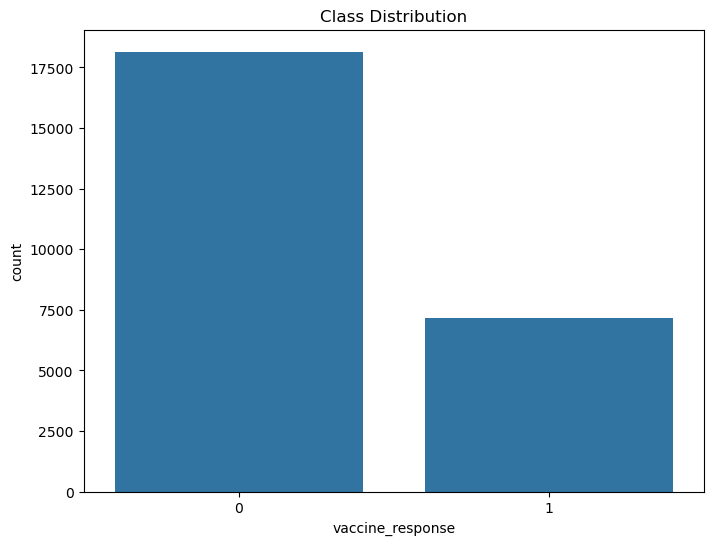

In [367]:
plt.figure(figsize=(8, 6))
sns.countplot(x='vaccine_response', data=fluprint_clean)
plt.title('Class Distribution')
plt.show()

In [397]:
result = fluprint_clean[fluprint_clean['data'].isna()]
len(result)

0

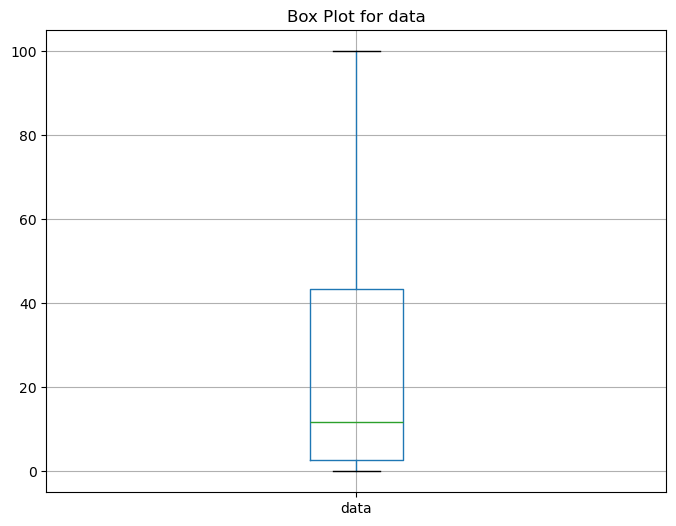

In [417]:
plt.figure(figsize=(8, 6))
fluprint_clean.boxplot(column=['data'])
plt.title('Box Plot for data')
plt.show()

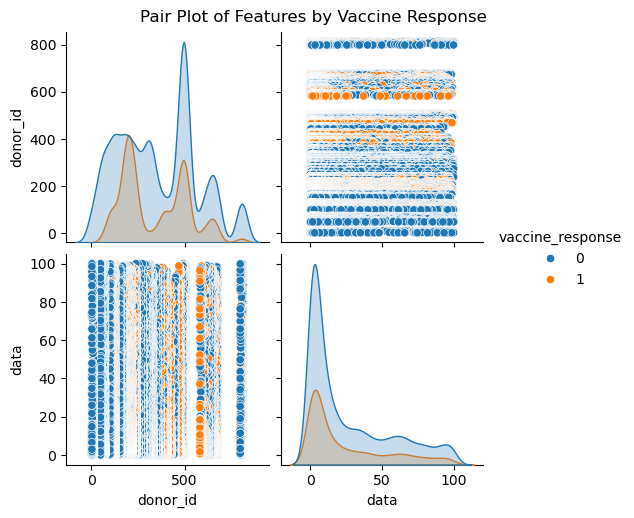

In [431]:
sns.pairplot(fluprint_clean, hue='vaccine_response', diag_kind='kde')
plt.suptitle('Pair Plot of Features by Vaccine Response', y=1.02)
plt.show()

In [433]:
fluprint_clean['donor_id'] = fluprint_data['donor_id'].astype('object')

In [437]:
X = fluprint_clean.drop('vaccine_response', axis=1)
y = fluprint_clean['vaccine_response']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [439]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts(normalize=True))

ValueError: could not convert string to float: 'CD161_pos_NK_cells'

In [441]:
fluprint_clean.to_csv('output.csv', index=False)